In [1]:
import os
import pandas as pd

In [55]:
#path = "/home/jinhanqi/tf_program/summarization_log/baseline_seq2seq"

In [394]:
path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq"

In [825]:
#path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq_hidddendim400_embdim200_maxdecstep20"

In [430]:
path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq_SplitKeyword"

In [424]:
path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq_SplitKeyword_MLPgateTrue"

In [425]:
#path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq_SplitKeyword_wordsratio0.8"

In [409]:
path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq_SplitKeyword_opAdam_lr0.001_MLPgateTrue_inpTrue_maxdecsteps20"

In [426]:
#path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq_SplitKeyword_opAdam_lr0.00005_MLPgateTrue_inpTrue_maxdecsteps20"

In [427]:
#path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq_SplitKeyword_opAdam_lr0.00001_MLPgateTrue_inpTrue_maxdecsteps20"

In [2]:
path = '/home/jinhanqi/tf_program/summarization_log/review_seq2seq_lr0.15_'

In [3]:
list_path = os.listdir(path)

decode_path = [p for p in list_path if p.find('decode_')>=0]

def sort_func(a, b):
    if len(a) == len(b):
        return a < b
    return len(a) < len(b)

decode_path = sorted(decode_path, lambda x,y: -sort_func(x, y))
decode_path

['decode_maxenc_250beam_5mindec_1maxdec_15ckpt-311',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-9249',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-17262',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-25405',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-32491',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-39542',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-46733',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-54303',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-62094',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-71323',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-79332',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-87127',
 'decode_maxenc_250beam_5mindec_1maxdec_15ckpt-94424']

In [4]:
with open(path+'/rouge', 'wb+') as f:
    f.write(os.path.basename(path)+"/"+decode_path[0].split('-')[0]+"\n"+"\n")
rouge_most = "r"
rouge1 = []
rouge2 = []
rougel = []
x = []
for p in decode_path:
    filename = path+"/"+p+"/ROUGE_results.txt"
    #print filename
    if os.path.exists(filename)==False:
        continue
    with open(filename, 'r') as f:
        con = f.readlines()
        rouge_1 = con[2][17:23]
        rouge_2 = con[7][17:23]
        rouge_l = con[12][17:23]
    rouge1.append(float(rouge_1))
    rouge2.append(float(rouge_2))
    rougel.append(float(rouge_l))
    rouge = 'rouge_1: '+rouge_1+'   '+'rouge_2: '+rouge_2+'   '+'rouge_l: '+rouge_l
    if rouge > rouge_most:
        rouge_most = rouge
        path_most = p
    with open(path+'/rouge', 'a+') as f:
        #print p+con+'\n'+'\n'
        _p = path+"/"+p
        f.write(p.split('-')[-1]+":  "+rouge+'\n')
    x.append(int(p.split('-')[-1]))
with open(path+'/rouge', 'a+') as f:
    f.write('\nrouge_most-' + path_most.split('-')[-1]+":  "+rouge_most+'\n')

with open(path+"/rouge", "r") as f:
    print f.read()

review_seq2seq_lr0.15_/decode_maxenc_250beam_5mindec_1maxdec_15ckpt

311:  rouge_1: 0.0421   rouge_2: 0.0010   rouge_l: 0.0421
9249:  rouge_1: 0.0871   rouge_2: 0.0243   rouge_l: 0.0867
17262:  rouge_1: 0.1060   rouge_2: 0.0244   rouge_l: 0.1054
25405:  rouge_1: 0.1140   rouge_2: 0.0307   rouge_l: 0.1130
32491:  rouge_1: 0.1237   rouge_2: 0.0307   rouge_l: 0.1229
39542:  rouge_1: 0.1226   rouge_2: 0.0367   rouge_l: 0.1214
46733:  rouge_1: 0.1279   rouge_2: 0.0301   rouge_l: 0.1267
54303:  rouge_1: 0.1334   rouge_2: 0.0344   rouge_l: 0.1320
62094:  rouge_1: 0.1240   rouge_2: 0.0346   rouge_l: 0.1228
71323:  rouge_1: 0.1269   rouge_2: 0.0357   rouge_l: 0.1258
79332:  rouge_1: 0.1250   rouge_2: 0.0347   rouge_l: 0.1242
87127:  rouge_1: 0.1212   rouge_2: 0.0336   rouge_l: 0.1201

rouge_most-54303:  rouge_1: 0.1334   rouge_2: 0.0344   rouge_l: 0.1320



计算rouge的分布情况

In [5]:
len(rouge1)

12

In [69]:
pd_rouge1 = pd.DataFrame(rouge1, columns=["rouge1"])

In [70]:
pd_rouge1.describe()

,rouge1
count,6.000000
mean,0.099250
std,0.031048
min,0.042100
25%,0.091825
50%,0.110000
75%,0.120450
max,0.123700


画图展示

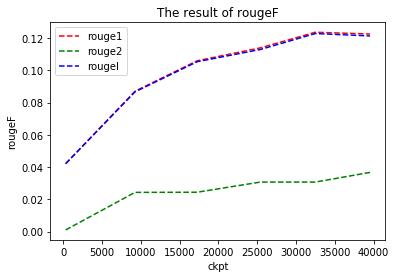

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

l1=plt.plot(x,rouge1,'r--',label='rouge1')
l2=plt.plot(x,rouge2,'g--',label='rouge2')
l3=plt.plot(x,rougel,'b--',label='rougel')
#plt.plot(x,rouge1,'ro-',x,rouge2,'g+-',x,rougel,'b^-')
plt.title('The result of rougeF')
plt.xlabel('ckpt')
plt.ylabel('rougeF')
plt.legend()
plt.show()

## 删除某个目录下的decode和reference结果，只保留rouge值最高的两个目录的decode

In [72]:
#path = "/home/jinhanqi/tf_program/summarization_log/baseline_seq2seq"

In [73]:
#path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq"

In [74]:
#path = "/home/jinhanqi/tf_program/summarization_log/gigaword_seq2seq_hidddendim400_embdim200_maxdecstep20"

In [75]:
def sortByRouge(root, x, y):
    with open(root+"/"+x+"/ROUGE_results.txt", 'r') as f:
        rouge_x = f.readlines()
        rouge_x = rouge_x[2][17:23]
    with open(root+"/"+y+"/ROUGE_results.txt", 'r') as f:
        rouge_y = f.readlines()
        rouge_y = rouge_y[2][17:23]
    return rouge_x < rouge_y

In [76]:
list_path = os.listdir(path)

decode_path = [p for p in list_path if p.find('decode_')>=0]

root = path
_delete_path = [p for p in decode_path if os.path.isfile(root+"/"+p+"/"+"ROUGE_results.txt") == True]
_delete_path

delete_path = sorted(_delete_path, lambda x,y: -sortByRouge(root, x, y))

#delete_path

In [77]:
#delete_path[0:-2]

In [78]:
import shutil

for p in delete_path[0:-2]:
    if os.path.exists(root+"/"+p+"/"+"decoded"):
        shutil.rmtree(root+"/"+p+"/"+"decoded")
    if os.path.exists(root+"/"+p+"/"+"reference"):
        shutil.rmtree(root+"/"+p+"/"+"reference")

for p in delete_path[0:-1]:
    if os.path.exists(root+"/"+p+"/"+"reference"):
        shutil.rmtree(root+"/"+p+"/"+"reference")

In [79]:
os.listdir(root+"/"+delete_path[-3])

['ROUGE_results.txt']

In [40]:
#!nvidia-smi

In [382]:
lr=0.0005

In [ ]:
lr = 0.00005